In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch
import discord
import nest_asyncio
from discord.ext import commands
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

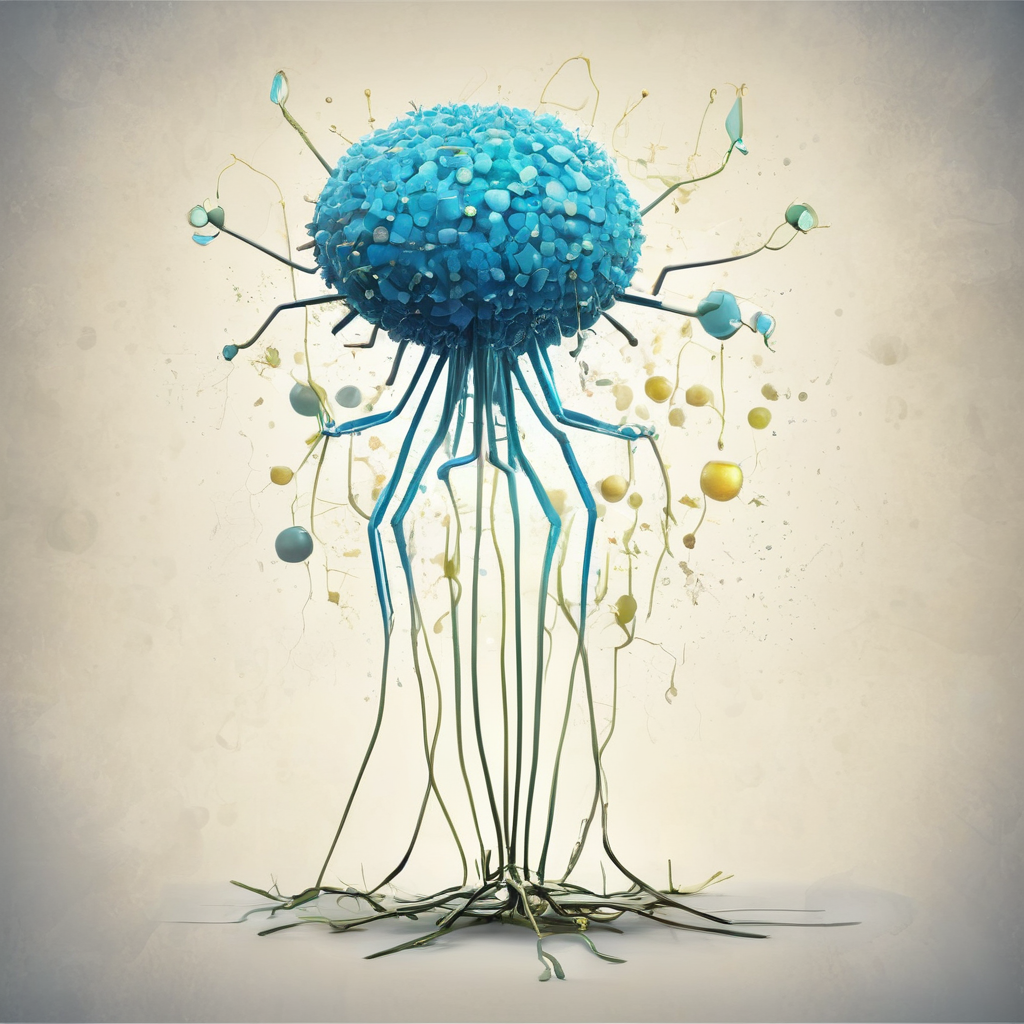

In [ ]:
prompt = "artistic rendering Bacteriophage saying Thank You "
neg_prompt = " blurry, poor quality,no details, poor background, no continuation, unrealistic"
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]
image

In [ ]:
import google.generativeai as genai

genai.configure(api_key="YOUR-KEY")

# Set up the model
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 128,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

model = genai.GenerativeModel(model_name="gemini-1.0-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

# convo = model.start_chat(history=[])
# convo.send_message("PROOMT")
# print(convo.last.text)

In [ ]:
def predicto(Prompt):
    neg_prompt = "cartoonish, blurry, poor quality,no details, poor background ,no continuation"
    image = pipe(prompt=Prompt, negative_prompt=neg_prompt).images[0]
    image.save('temp.jpg')
    idisg = discord.File('temp.jpg')
    return idisg

In [ ]:
prompts_in_one = []

In [ ]:
intents = discord.Intents.default()
intents.message_content = True
intents.messages = True

bot = commands.Bot(command_prefix='/', intents=intents)

@bot.event
async def on_ready():
    print("We are ready broo")


@bot.event
async def on_message(message):
    if message.content.startswith('?working'):
        await message.channel.send("Yes remember to prompt using '/gen'")

    await bot.process_commands(message)


@bot.command()
async def gen(ctx, *args):
    message = ' '.join(args)
    await ctx.send("Generating...")
    output = predicto(message)
    prompts_in_one.append(message)
    await ctx.send(file = output)


@bot.command()
async def regen(ctx):
    await ctx.send("Regenerating the last prompt...")
    output = predicto(prompts_in_one[-1])
    await ctx.send(file = output)

@bot.command()
async def talk(ctx, *args):
    message = ' '.join(args)
    convo = model.start_chat(history=[])
    convo.send_message(message)
    output = convo.last.text
    # print(convo.last.text)
    # print(message)
    await ctx.send(output)

@bot.command()
async def naruto(ctx, *args):
    message = ' '.join(args)
    convo = model.start_chat(history=["You are a imitation of the famous character Naruto and you will answer to me as naruto would"])
    convo.send_message(message)
    output = convo.last.text
    await ctx.send(output)

def run_bot():
    bot.run("YOUR-TOKEN")


nest_asyncio.apply()

run_bot()



2024-02-18 07:34:54 INFO     discord.client logging in using static token
INFO:discord.client:logging in using static token
2024-02-18 07:34:55 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: d973d73030190caf171d27e5a83603c2).
INFO:discord.gateway:Shard ID None has connected to Gateway (Session ID: d973d73030190caf171d27e5a83603c2).


We are ready broo
